In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
#1,2
hdulist = fits.open('../data/gll_iem_v02_P6_V11_DIFFUSE.fit')
hdulist.info()

Filename: ../data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [2]:
#3
print(len(hdulist))

2


In [3]:
phead=hdulist[0]
dir(phead);

In [4]:
phead.header;

In [5]:
#4
t4list=[]
t4list.append(phead.header['NAXIS3'])
t4list.append(phead.header['CTYPE3'])
t4list.append(phead.header['CUNIT3'])
t4list.append(phead.header['TELESCOP'])
t4list.append(phead.header['OBSERVER'])
t4list

[30, 'photon energy', 'MeV', 'GLAST', 'MICHELSON']

In [6]:
#5
print('maximum of pixel value in first slice=',phead.data[0].max())
print('minimum of pixel value in first slice=',phead.data[0].min())
print('standard deviation of pixel value in first slice=',phead.data[0].std())

maximum of pixel value in first slice= 4.5921523e-05
minimum of pixel value in first slice= 7.027717e-08
standard deviation of pixel value in first slice= 1.3843595e-06


In [7]:
imgdata=phead.data

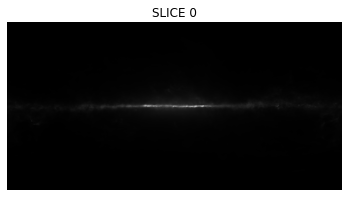

In [8]:
#6
import numpy as np
imgfin5=np.zeros((imgdata[0]).shape)
for i in range(imgdata.shape[0]):
    if i%5==0:
        imgfin5=imgfin5+imgdata[i]
plt.axis('off')
plt.title('SLICE 0')
plt.imshow(imgdata[0],cmap='gray',vmin=np.min(imgdata[0]),vmax=np.max(imgdata[0]),origin='lower')

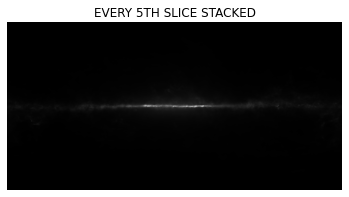

In [9]:
#7
plt.axis('off')
plt.title('EVERY 5TH SLICE STACKED')
plt.imshow(imgfin5,cmap='gray',vmin=np.min(imgfin5),vmax=np.max(imgfin5),origin='lower')

In [10]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [11]:
coords = SkyCoord(12.11*u.deg, 85.26*u.deg)
iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
time = Time('2021-7-11 22:00:00') - 5.5*u.hour

In [12]:
#8
def altplot(coords,time):
    delta_t = np.linspace(0, 12, 100)*u.hour
    frame_t = AltAz(obstime=time+delta_t,location=iitm)
    coordaltaz_t = coords.transform_to(frame_t)
    coordaltarr=[i.alt.degree for i in coordaltaz_t]
    plt.plot(delta_t, coordaltarr)
    plt.xlabel('Hours from given time(t(hrs))')
    plt.ylabel('Altitude(in degrees)')
    plt.show()

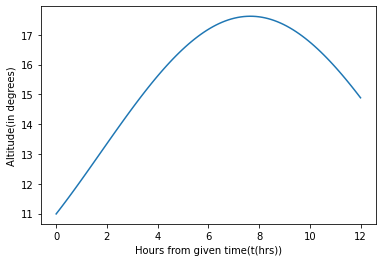

In [13]:
altplot(coords,time)